In [3]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [4]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/validation'


In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [6]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(train)

                                image     label
0        images/train\angry\10002.jpg     angry
1        images/train\angry\10016.jpg     angry
2        images/train\angry\10037.jpg     angry
3        images/train\angry\10038.jpg     angry
4        images/train\angry\10057.jpg     angry
...                               ...       ...
27950  images/train\surprise\9969.jpg  surprise
27951  images/train\surprise\9985.jpg  surprise
27952  images/train\surprise\9990.jpg  surprise
27953  images/train\surprise\9992.jpg  surprise
27954  images/train\surprise\9996.jpg  surprise

[27955 rows x 2 columns]


In [8]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(test)
print(test['image'])

                                    image     label
0       images/validation\angry\10052.jpg     angry
1       images/validation\angry\10065.jpg     angry
2       images/validation\angry\10079.jpg     angry
3       images/validation\angry\10095.jpg     angry
4       images/validation\angry\10121.jpg     angry
...                                   ...       ...
7061  images/validation\surprise\9806.jpg  surprise
7062  images/validation\surprise\9830.jpg  surprise
7063  images/validation\surprise\9853.jpg  surprise
7064  images/validation\surprise\9878.jpg  surprise
7065   images/validation\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/validation\angry\10052.jpg
1         images/validation\angry\10065.jpg
2         images/validation\angry\10079.jpg
3         images/validation\angry\10095.jpg
4         images/validation\angry\10121.jpg
                       ...                 
7061    images/validation\surprise\9806.jpg
7062    images/validation\surprise\9830.jpg

In [10]:
from tqdm.notebook import tqdm

In [11]:
def extract_features(images):
    features = []
    for image_path in tqdm(images):
        img = load_img(image_path, grayscale=True, target_size=(48, 48))  # Load image and resize
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    return features

train_features = extract_features(train['image'])



  0%|          | 0/27955 [00:00<?, ?it/s]

C:\Users\mraja\anaconda3\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [12]:
 test_features = extract_features(test['image'])


  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])


In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
from keras.layers import LeakyReLU

model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation=LeakyReLU(alpha=0.01), input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation=LeakyReLU(alpha=0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation=LeakyReLU(alpha=0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation=LeakyReLU(alpha=0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation=LeakyReLU(alpha=0.01)))
model.add(Dropout(0.4))
model.add(Dense(256, activation=LeakyReLU(alpha=0.01)))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))


In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )



In [20]:
history = model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 70, validation_data = (x_test,y_test))

Epoch 1/70
219/219 [==============================] - 381s 2s/step - loss: 1.8156 - accuracy: 0.2456 - val_loss: 1.7905 - val_accuracy: 0.2587
Epoch 2/70
219/219 [==============================] - 434s 2s/step - loss: 1.7318 - accuracy: 0.2877 - val_loss: 1.6283 - val_accuracy: 0.3525
Epoch 3/70
219/219 [==============================] - 500s 2s/step - loss: 1.5845 - accuracy: 0.3805 - val_loss: 1.4768 - val_accuracy: 0.4249
Epoch 4/70
219/219 [==============================] - 411s 2s/step - loss: 1.4663 - accuracy: 0.4308 - val_loss: 1.3743 - val_accuracy: 0.4759
Epoch 5/70
219/219 [==============================] - 431s 2s/step - loss: 1.3960 - accuracy: 0.4637 - val_loss: 1.2932 - val_accuracy: 0.5065
Epoch 6/70
219/219 [==============================] - 416s 2s/step - loss: 1.3456 - accuracy: 0.4837 - val_loss: 1.2679 - val_accuracy: 0.5188
Epoch 7/70
219/219 [==============================] - 402s 2s/step - loss: 1.3086 - accuracy: 0.4991 - val_loss: 1.2352 - val_accuracy: 0.5338

Epoch 58/70
219/219 [==============================] - 362s 2s/step - loss: 0.5872 - accuracy: 0.7882 - val_loss: 1.1429 - val_accuracy: 0.6251
Epoch 59/70
219/219 [==============================] - 361s 2s/step - loss: 0.5854 - accuracy: 0.7878 - val_loss: 1.1238 - val_accuracy: 0.6269
Epoch 60/70
219/219 [==============================] - 363s 2s/step - loss: 0.5823 - accuracy: 0.7893 - val_loss: 1.1209 - val_accuracy: 0.6286
Epoch 61/70
219/219 [==============================] - 362s 2s/step - loss: 0.5732 - accuracy: 0.7929 - val_loss: 1.1350 - val_accuracy: 0.6371
Epoch 62/70
219/219 [==============================] - 363s 2s/step - loss: 0.5708 - accuracy: 0.7921 - val_loss: 1.1119 - val_accuracy: 0.6288
Epoch 63/70
219/219 [==============================] - 358s 2s/step - loss: 0.5544 - accuracy: 0.8011 - val_loss: 1.1377 - val_accuracy: 0.6271
Epoch 64/70
219/219 [==============================] - 358s 2s/step - loss: 0.5582 - accuracy: 0.7986 - val_loss: 1.1071 - val_accuracy:

In [21]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\mraja\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from keras.models import model_from_json


In [23]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")


In [24]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

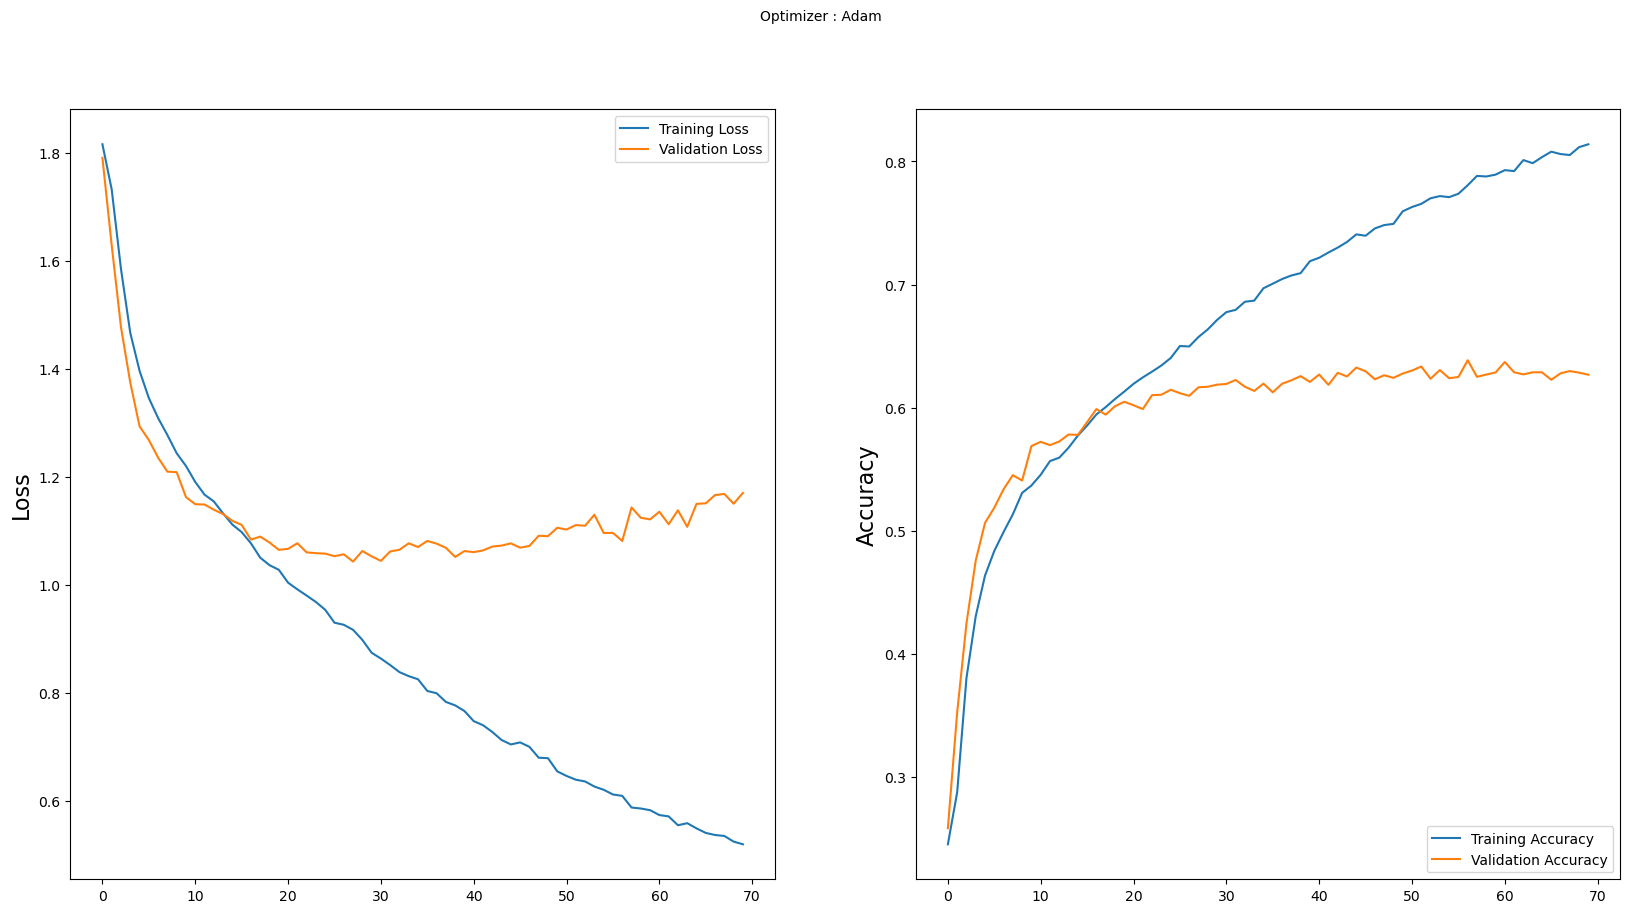

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

221/221 [==============================] - 16s 72ms/step


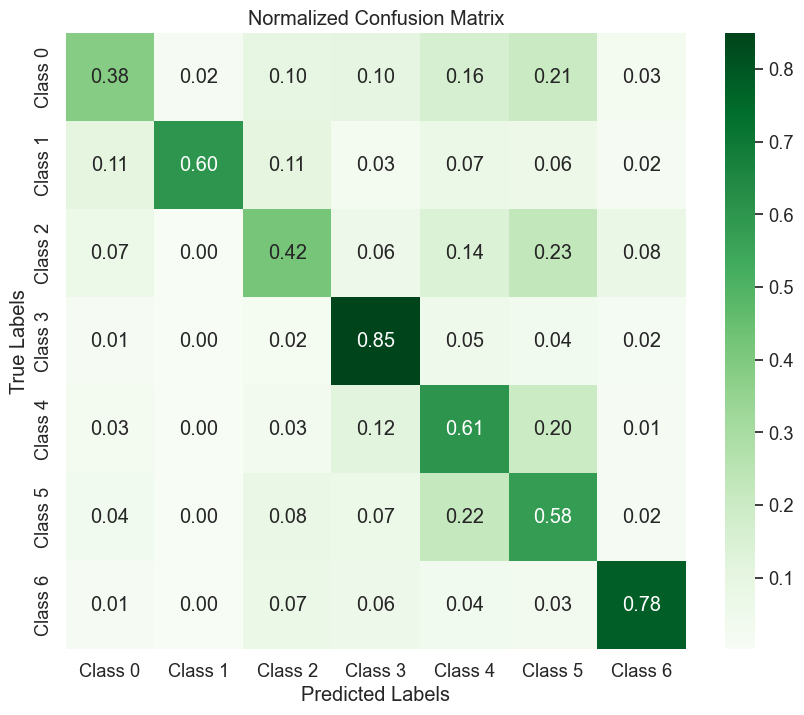

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
norm_conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
class_names = [f"Class {i}" for i in range(conf_matrix.shape[0])]
conf_matrix_df = pd.DataFrame(norm_conf_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_df, annot=True, fmt=".2f", cmap="Greens")  # Use 'Blues_d' colormap for dark blue

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()


In [27]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

original image is of sad
1/1 [==============================] - 0s 96ms/step
model prediction is  sad


C:\Users\mraja\anaconda3\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


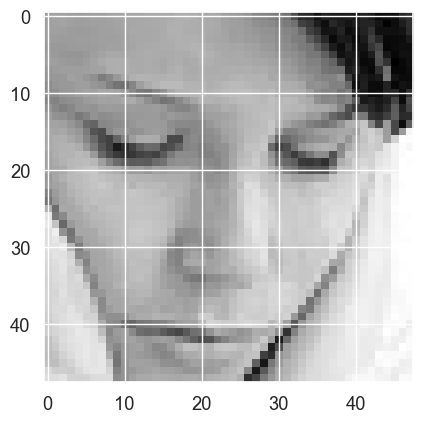

In [28]:
import matplotlib.pyplot as plt
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 33ms/step
model prediction is  fear


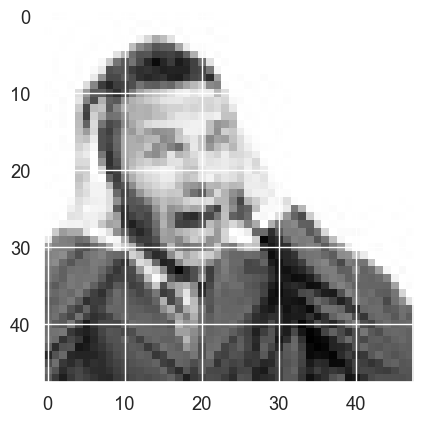

In [29]:
image = 'images/train/fear/17.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

1/1 [==============================] - 0s 24ms/step
Original image is of happy
Model prediction is happy


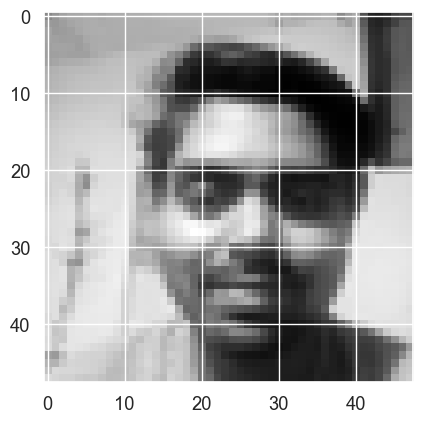

In [30]:
from PIL import Image
import numpy as np

image_path = r"C:\Users\mraja\OneDrive\Documents\python\Face_Emotion_Recognition_Machine_Learning-main\images\train\happy\0.jpeg"

# Load and preprocess the image using PIL
img = Image.open(image_path).convert('L')  # Convert to grayscale
img = img.resize((48, 48))  # Resize to model input size
img = np.array(img) / 255.0  # Convert to NumPy array and normalize pixel values to [0, 1]

# Reshape image for model prediction
img = img.reshape(1, 48, 48, 1)

pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Original image is of happy")
print("Model prediction is", pred_label)

import matplotlib.pyplot as plt
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()
